In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [5]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

x = df.drop('Purchased',axis=1).values
y = df['Purchased'].values

sc = StandardScaler()
xsc = sc.fit_transform(x)

xtrain,xtest,ytrain,ytest = train_test_split(xsc,y,test_size=0.2,random_state=42)



In [20]:

gdmodel = GradientBoostingClassifier(learning_rate=0.01,n_estimators=500)
# n_estimators=1 getting 1 weak learners
gdmodel.fit(xtrain,ytrain).score(xtest,ytest)

0.9473684210526315

In [21]:
yhat = gdmodel.predict(xtest)
print(classification_report(ytest,yhat))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        32
           1       0.89      1.00      0.94        25

    accuracy                           0.95        57
   macro avg       0.95      0.95      0.95        57
weighted avg       0.95      0.95      0.95        57



(75, 89) (75, 89)


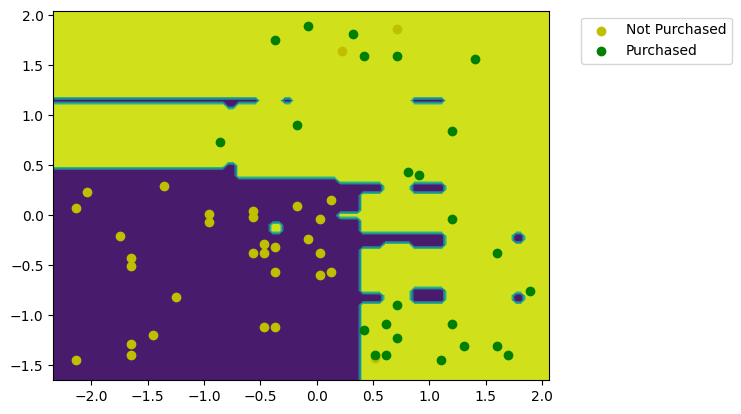

In [22]:
age = np.arange(np.min(xtest[:,0])-0.2, np.max(xtest[:,0])+0.2, 0.05)
salary = np.arange(np.min(xtest[:,1])-0.2, np.max(xtest[:,1])+0.2, 0.05)

# here -0.2 and +0.2 is just for padding so our plot's curves do not touch the axes.

AGE,SAL = np.meshgrid(age,salary)
print(AGE.shape, SAL.shape)

# In X rows values' are same
# In Y column values' are same

feature1 = AGE.ravel()
feature2 = SAL.ravel()

test_vals = np.c_[feature1,feature2]
test_vals.shape

# concatenate as per model's need and reshape to 2D shape so that contour can be plot
# get predicted answers
pred_ans = gdmodel.predict(test_vals).reshape(AGE.shape)
pred_ans.shape

plt.contourf(AGE,SAL,pred_ans)

plt.scatter(xtest[ytest==0,0],xtest[ytest==0,1], c='y',label='Not Purchased')
plt.scatter(xtest[ytest==1,0],xtest[ytest==1,1], c='g',label='Purchased')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)